In [18]:
library(phangorn)

In [19]:
seq_data <- dir(pattern = 'fasta')[-grep('subset', dir(pattern = 'fasta'))]

In [20]:
seq_data

[1] "s1_relaxed.fasta"  "s1_strict.fasta"   "s10_relaxed.fasta"
 [4] "s10_strict.fasta"  "s2_relaxed.fasta"  "s2_strict.fasta"  
 [7] "s3_relaxed.fasta"  "s3_strict.fasta"   "s4_relaxed.fasta" 
[10] "s4_strict.fasta"   "s5_relaxed.fasta"  "s5_strict.fasta"  
[13] "s6_relaxed.fasta"  "s6_strict.fasta"   "s7_relaxed.fasta" 
[16] "s7_strict.fasta"   "s8_relaxed.fasta"  "s8_strict.fasta"  
[19] "s9_relaxed.fasta"  "s9_strict.fasta"

In [22]:
out_matrix <- matrix(NA, length(seq_data), 2)
colnames(out_matrix) <- c('strict', 'relaxed')
rownames(out_matrix) <- seq_data
out_matrix

,strict,relaxed
s1_relaxed.fasta,NA,NA
s1_strict.fasta,NA,NA
s10_relaxed.fasta,NA,NA
s10_strict.fasta,NA,NA
s2_relaxed.fasta,NA,NA
s2_strict.fasta,NA,NA
s3_relaxed.fasta,NA,NA
s3_strict.fasta,NA,NA
s4_relaxed.fasta,NA,NA
s4_strict.fasta,NA,NA


In [10]:
for(s in 1:length(seq_data)){
    test_data <- read.dna(seq_data[s], format = 'fasta')
    test_data <- phyDat(test_data[, (ncol(test_data)/2+1):ncol(test_data)])
    
    #strict
    sc_phylogs <- read.tree(paste0('runs/', gsub('[.]fasta', '_subset_strict_phylogs.trees', seq_data[s])))
    
    sc_liks <- vector()
    for(r in 1:length(sc_phylogs)){
        sc_liks[r] <- pml(tree = sc_phylogs[[r]], data = test_data)$logLik
    }
    
    #ucl
    ucl_phylogs <- read.tree(paste0('runs/', gsub('[.]fasta', '_subset_ucld_phylogs.trees', seq_data[s])))

    ucl_liks <- vector()
    for(r in 1:length(ucl_phylogs)){
        ucl_liks[r] <- pml(tree = ucl_phylogs[[r]], data = test_data)$logLik
    }

    out_matrix[s, 1] <- mean(sc_liks)
    out_matrix[s, 2] <- mean(ucl_liks)
}

In [11]:
out_matrix
#If this works, the questions are
# - Can we do this using a small subset of data for genomic data sets?
# - Can we detect the strict clock when the substitution model is wrong? 
# - Can this also be used to select demographic models? e.g. simulate exponential growth vs constant size

,strict,relaxed
s1_relaxed.fasta,-1628.991,-1626.694
s1_strict.fasta,-1591.942,-1592.045
s2_relaxed.fasta,-1874.350,-1874.844
s2_strict.fasta,-1865.612,-1866.503


In [34]:
pml(tree = ucl_phylogs[[1]], data = phyDat(test_data))


 loglikelihood: -3387.602 

unconstrained loglikelihood: -1438.355 

Rate matrix:
  a c g t
a 0 1 1 1
c 1 0 1 1
g 1 1 0 1
t 1 1 1 0

Base frequencies:  
0.25 0.25 0.25 0.25 

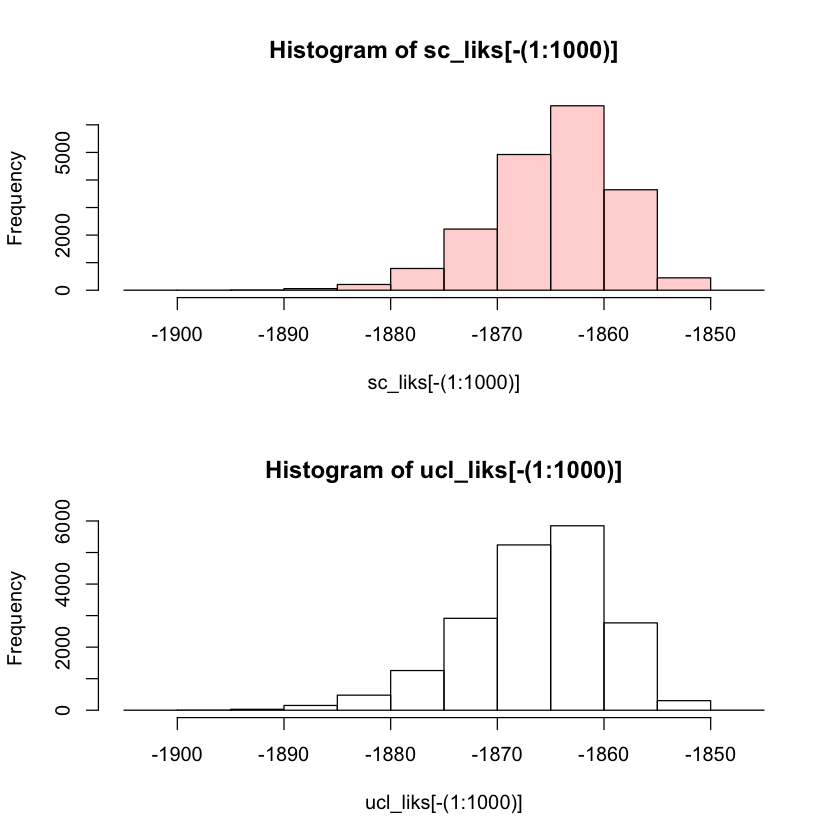

In [17]:
par(mfrow = c(2, 1))
hist(sc_liks[-(1:1000)], col = rgb(1, 0, 0, 0.2))
hist(ucl_liks[-(1:1000)])


In [16]:
median(sc_liks)
median(ucl_liks)

[1] -1864.064

[1] -1865.558